<a href="https://colab.research.google.com/github/arthurweslen/PowerQuery_DAX/blob/main/DAX/rankx_e_topn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RANKX e TOPN

Nesse exemplo,vamos ver a utilização do RANKX e TOPN

RANKX
1) Primeiro usamos o RANKX combinando com o ALL
2) Utilize a medida do total (Que sera usada como parâmetro de valor)
3) Apenas assim já funcina, mas eu forcei o DESC, para pegar do maior para o menor
4) Jogando na tabela, ela tenta mostrar um total, então foi criado uma medida com ISINSCOPE

In [ ]:
Rank Maiores Valores =
VAR RANK_VALORES =
RANKX(
    ALL('bcdata sgs 1378'[Produto]),
    [Total],
    ,
    DESC
)

// #Ao criar Rank Valores, ele coloca o valor 1 no total, e não faz sentido, então essa variável retira.
VAR NAO_SOMAR_RANK =
IF(
    ISINSCOPE('bcdata sgs 1378'[Produto]),
    RANK_VALORES
)

RETURN NAO_SOMAR_RANK

TOPN

1) Coloque a quantidade que deseja *(No exemplo eu coloquei 5,mas poderia ser qualquer número)*
2) Escolha a coluna usando ALL
3) Utilize sua medida de total
4) Crie uma medida com Calculate, medida total e o KEEPFILTES(variavel)

In [ ]:
TOPN (5 Maiores Valores) =
VAR TOP5 =
TOPN(
    5,
    ALL('bcdata sgs 1378'[Produto]),
    [Total])

VAR RESULTADO =
CALCULATE(
    [Total],
    KEEPFILTERS(TOP5))

RETURN RESULTADO

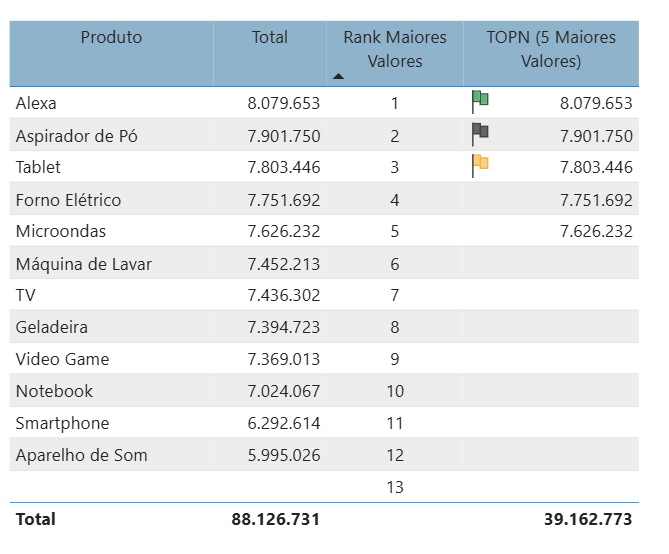

# Segmentando por TOPN

1) Crie uma tabela,usando inserir dados
2) Nela terá todos os TOP desejados

*   No meu exemplo coloquei TOP3, TOP5, TOP10 e TOP20
*   Crie o LimiteMaximo e LImiteMinimo *(Limite maximo tem que ser igual ao TOPN e o limite minimo tem que ser maior que a linha anterior ou numero 1)*




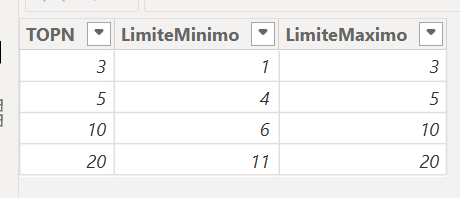



Após criara tabela, será necessário criar a medida

Aqui vamos reutilizar a medida de total e a medida [Rank Maiores Valores]
Essa versão 1 vamos fazer simplesmente menor ou igual a coluna TOPN

In [ ]:
Total Vendido (TOPN)v1 =

CALCULATE(
    [Total],
    FILTER(
        VALUES('bcdata sgs 1378'[Produto]),
        [Rank Maiores Valores] <= MAX(d_Limites[TOPN])))

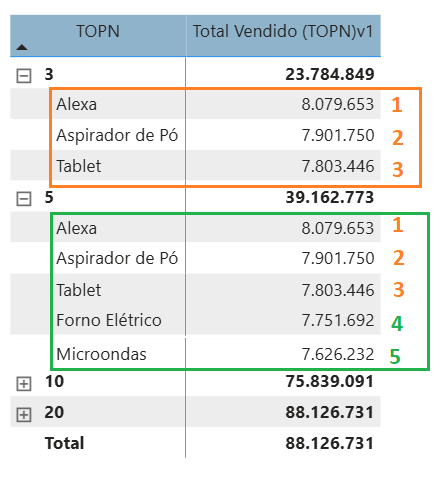

Segunda versão

Na versão anterior, os valores que estão no TOP3 também aparece no TOP5, e assim por diante.

Agora nessa versão vamos mostrar apenas que fazem parte do TOP5, então seria o 4 e 5 lugar



In [ ]:
Total Vendido (TOPN)v2 =

CALCULATE(
    [Total],
    FILTER(
        VALUES('bcdata sgs 1378'[Produto]),
        [Rank Maiores Valores] <= MAX(d_Limites[LimiteMaximo])&&
        [Rank Maiores Valores] >= MIN(d_Limites[LimiteMinimo])
        ))

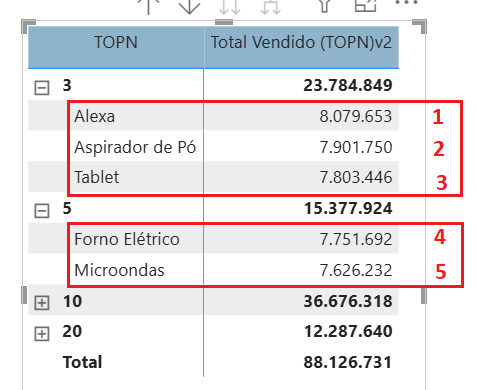